In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
from datetime import datetime,date
import skill_metrics as sm
import tkinter 
import scipy as sp
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')


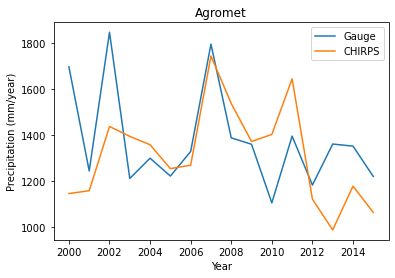

In [2]:
# Data for Agromet
ca=xr.open_dataset('chirps_agromet.nc')
Ga=xr.open_dataset('GPCC_agromet.nc')

y_ga=Ga.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for gauge
y_ca=ca.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for chirps

y_ga.plot(label='Gauge')
y_ca.plot(label='CHIRPS')
plt.legend()
plt.title('Agromet')
plt.ylabel('Precipitation (mm/year)')
plt.xlabel('Year')
plt.savefig('Agromet_time.jpeg')

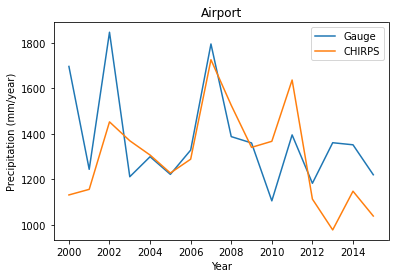

In [3]:
# Data for Airport
ca=xr.open_dataset('chirps_airport.nc')
Ga=xr.open_dataset('GPCC_airport.nc')

y_ga=Ga.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for gauge
y_ca=ca.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for chirps

y_ga.plot(label='Gauge')
y_ca.plot(label='CHIRPS')
plt.legend()
plt.title('Airport')
plt.ylabel('Precipitation (mm/year)')
plt.xlabel('Year')
plt.savefig('Airport_time.jpeg')

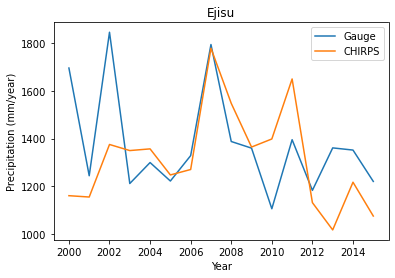

In [4]:
# Data for only Ejisu
dat=xr.open_dataset('chirps_ejisu.nc')

gag=xr.open_dataset('GPCC_ejisu.nc')


year=gag.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for gauge
year_d=dat.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for chirps

year.plot(label='Gauge')
year_d.plot(label='CHIRPS')
plt.legend()
plt.title('Ejisu')
plt.ylabel('Precipitation (mm/year)')
plt.xlabel('Year')
plt.savefig('Ejisu_time.jpeg')

In [5]:
# mon_g.plot()
# mon_d.plot()

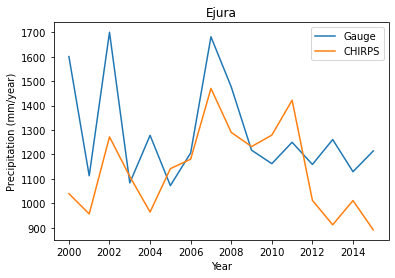

In [6]:
# Data for Ejura
Ce=xr.open_dataset('chirps_ejura.nc')
Ge=xr.open_dataset('GPCC_ejura.nc')


y_Ge=Ge.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for gauge
y_Ce=Ce.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for chirps

y_Ge.plot(label='Gauge')
y_Ce.plot(label='CHIRPS')
plt.legend()
plt.title('Ejura')
plt.ylabel('Precipitation (mm/year)')
plt.xlabel('Year')
plt.savefig('Ejura_time.jpeg')

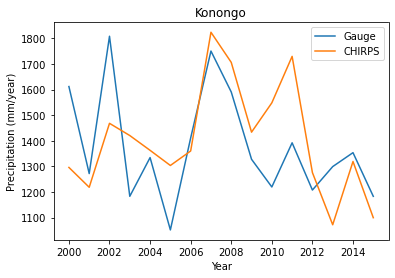

In [7]:
# Data for Konongo
ck=xr.open_dataset('chirps_konongo.nc')
Gk=xr.open_dataset('GPCC_konongo.nc')

y_gk=Gk.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for gauge
y_ck=ck.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Yearly average precip for chirps

y_gk.plot(label='Gauge')
y_ck.plot(label='CHIRPS')
plt.legend()
plt.title('Konongo')
plt.ylabel('Precipitation (mm/year)')
plt.xlabel('Year')
plt.savefig('Konongo_time.jpeg')

# Calculating the monthly average for the Agromet

In [8]:
mon_ga=ca.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for gauage
mon_ca=Ga.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for chirps

# Changing to dataframe
Agromet_ga=pd.DataFrame(mon_ga)
Agromet_ca=pd.DataFrame(mon_ca)


# Converting to an excel which is monthly average
Agromet_ga.to_excel('AGR_G.xlsx')
Agromet_ca.to_excel('AGR_C.xlsx')

# Calculating the monthly average for the Airport

In [9]:
yr_Ga=ca.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for gauage
yr_ca=Ga.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for chirps

# Changing to dataframe
Airport_ga=pd.DataFrame(yr_Ga)
Airport_ca=pd.DataFrame(yr_ca)

# Converting to an excel which is monthly average
Airport_ga.to_excel('AIR_G.xlsx')
Airport_ca.to_excel('AIR_C.xlsx')

# Calculating the monthly average for the Ejisu

In [10]:
mon_g=gag.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for gauage
mon_d=dat.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for chirps

# Changing to dataframe
Ejisu_g=pd.DataFrame(mon_g)
Ejisu_d=pd.DataFrame(mon_d)

# Converting chirps and gpcc(gauge) monthly averages to an excel file
Ejisu_g.to_excel('EJI_G.xlsx')  # Gauge monthly average in excel
Ejisu_d.to_excel('EJI_C.xlsx')  # Chirps monthly average in excel

# Calculating the monthly average for the Ejura

In [11]:
yr_Ge=Ge.precip.groupby('time.month').sum(dim=['time','lon','lat'])# Monthly average precip for gauage
yr_Ce=Ce.precip.groupby('time.month').sum(dim=['time','lon','lat'])# Monthly average precip for chirps

# Changing to dataframe
Ejura_Ge=pd.DataFrame(yr_Ge)
Ejura_Ce=pd.DataFrame(yr_Ce)

# Converting to an excel which is monthly average
Ejura_Ge.to_excel('EJU_G.xlsx')
Ejura_Ce.to_excel('EJU_C.xlsx')

# Calculating the monthly average for the Konongo

In [12]:
yr_Ck=ck.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for gauage
yr_Gk=Gk.precip.groupby('time.year').sum(dim=['time','lon','lat'])# Monthly average precip for chirps

# Changing to dataframe
Konongo_Gk=pd.DataFrame(yr_Gk)
Konongo_ck=pd.DataFrame(yr_Ck)


# Converting to an excel which is monthly average
Konongo_Gk.to_excel('KON_G.xlsx')
Konongo_ck.to_excel('KON_C.xlsx')

# Importing the excel files

In [13]:
Agromet=pd.read_excel('AGRO.xlsx') #reading the csv data
Airport=pd.read_excel('AIR.xlsx') #reading the csv data
Ejisu=pd.read_excel('EJI.xlsx') #reading the csv data
Ejura=pd.read_excel('EJU.xlsx') #reading the csv data
Konongo=pd.read_excel('KON.xlsx') #reading the csv data

In [14]:
Ejisu

,Unnamed: 0,G,C
0,0,1696.669683,1160.115723
1,1,1243.951697,1154.505981
2,2,1847.136166,1375.375366
3,3,1211.322170,1349.773926
4,4,1299.424254,1356.877441
5,5,1221.759783,1247.317749
6,6,1328.546196,1270.192749
7,7,1795.498904,1779.972900
8,8,1387.836737,1548.264282
9,9,1359.999450,1364.534790


In [15]:
fd= np.arange(2000,2016,1)
fe= np.arange(2000,2012,1)

In [16]:
Agromet.index=fd
Airport.index=fd
Ejisu.index=fd
Ejura.index=fe
Konongo.index=fd

In [17]:
pd.DataFrame([Ejisu.G, Ejisu.C]).T

,G,C
2000,1696.669683,1160.115723
2001,1243.951697,1154.505981
2002,1847.136166,1375.375366
2003,1211.322170,1349.773926
2004,1299.424254,1356.877441
2005,1221.759783,1247.317749
2006,1328.546196,1270.192749
2007,1795.498904,1779.972900
2008,1387.836737,1548.264282
2009,1359.999450,1364.534790


In [18]:
slf = pd.DataFrame([Konongo.G, Konongo.C]).T# Extracting portion of the data
slf

,G,C
2000,1611.609562,1295.832031
2001,1271.814144,1218.329346
2002,1807.992420,1468.007080
2003,1183.086056,1420.322754
2004,1334.249041,1362.555054
2005,1051.854519,1303.445679
2006,1410.928907,1360.037720
2007,1750.178229,1823.613770
2008,1590.327859,1705.958862
2009,1327.685669,1433.524658


## Agromet Taylor Diagram

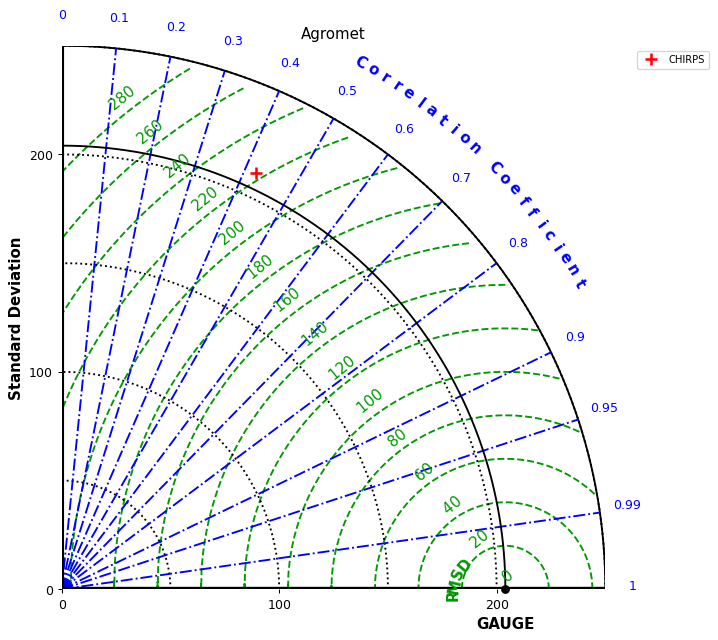

In [29]:
slf = pd.DataFrame([Agromet.G,Agromet.C])# Extracting portion of the data

slf=slf.T      #Transposed


slf_gauge=Agromet.G #Select all the Gauge Values
slf_chirp=Agromet.C #Select all the Chiprs values

corre = stats.pearsonr(slf_chirp,slf_gauge)#Correlation

mean= sum((slf_gauge-slf_chirp)**2)/len(slf_gauge)#calculation of mean

rmse = np.sqrt(mean)#calculation of root mean square

std_chirp = np.std(slf_chirp)# standard deviation 
std_gauge = np.std(slf_gauge)

slpd_cor = [1,corre[0]]
RMSE = [1,rmse]
std = [std_gauge,std_chirp]
label = ['GAUGE','CHIRPS']
#numberArray = np.array(([1,2,3],[4,5,6]))


fig1 = plt.figure(figsize=(12,8),dpi=90)

sdev = np.array(std)
crmsd = np.array(RMSE)
A_ccoef = np.array(slpd_cor)
rms = np.arange(0,300,20)

fig1=sm.taylor_diagram(sdev,crmsd,A_ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'GAUGE',alpha=0.1)
plt.title('Agromet')
plt.savefig("Agromet_Taylor.jpeg")

In [28]:
ccoef

array([1.        , 0.03521015])

In [30]:
A_ccoef

array([1.        , 0.42249086])

## Airport Taylor Diagram

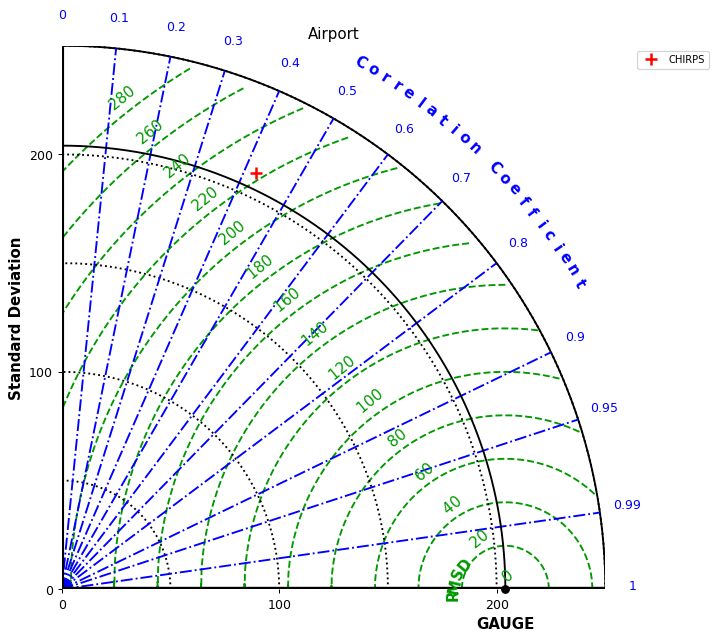

In [31]:
slf = pd.DataFrame([Airport.G,Airport.C])# Extracting portion of the data

slf=slf.T      #Transposed


slf_gauge=Airport.G #Select all the Gauge Values
slf_chirp=Airport.C #Select all the Chiprs values

corre = stats.pearsonr(slf_chirp,slf_gauge)#Correlation

mean= sum((slf_gauge-slf_chirp)**2)/len(slf_gauge)#calculation of mean

rmse = np.sqrt(mean)#calculation of root mean square

std_chirp = np.std(slf_chirp)# standard deviation 
std_gauge = np.std(slf_gauge)

slpd_cor = [1,corre[0]]
RMSE = [1,rmse]
std = [std_gauge,std_chirp]
label = ['GAUGE','CHIRPS']
#numberArray = np.array(([1,2,3],[4,5,6]))


fig1 = plt.figure(figsize=(12,8),dpi=90)

sdev = np.array(std)
crmsd = np.array(RMSE)
Ar_ccoef = np.array(slpd_cor)
rms = np.arange(0,300,20)

fig1=sm.taylor_diagram(sdev,crmsd,Ar_ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'GAUGE',alpha=0.1)
plt.title('Airport')
plt.savefig("Airport_time.jpeg_Taylor.jpeg")

In [32]:
Ar_ccoef

array([1.        , 0.42249086])

## Ejisu Taylor Diagram

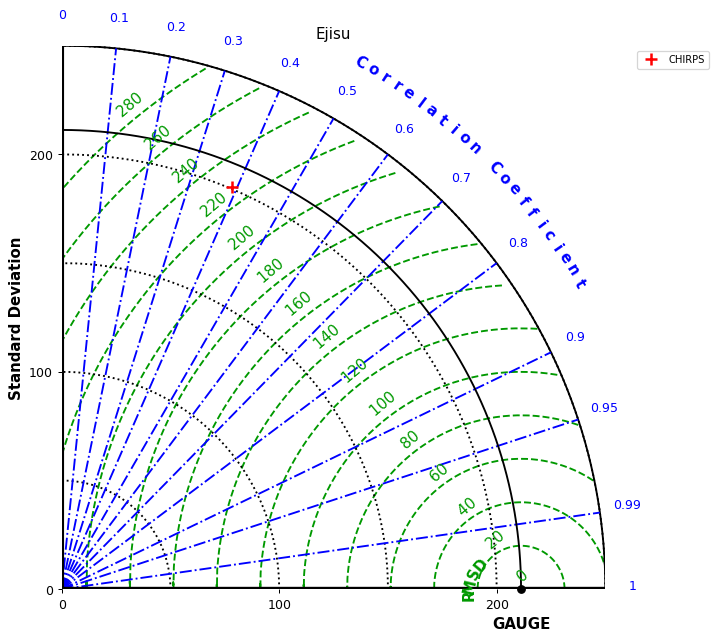

In [33]:
slf = pd.DataFrame([Ejisu.G,Ejisu.C])# Extracting portion of the data

slf=slf.T      #Transposed


slf_gauge=Ejisu.G #Select all the Gauge Values
slf_chirp=Ejisu.C #Select all the Chiprs values

corre = stats.pearsonr(slf_chirp,slf_gauge)#Correlation

mean= sum((slf_gauge-slf_chirp)**2)/len(slf_gauge)#calculation of mean

rmse = np.sqrt(mean)#calculation of root mean square

std_chirp = np.std(slf_chirp)# standard deviation 
std_gauge = np.std(slf_gauge)

slpd_cor = [1,corre[0]]
RMSE = [1,rmse]
std = [std_gauge,std_chirp]
label = ['GAUGE','CHIRPS']
#numberArray = np.array(([1,2,3],[4,5,6]))


fig1 = plt.figure(figsize=(12,8),dpi=90)

sdev = np.array(std)
crmsd = np.array(RMSE)
E_ccoef = np.array(slpd_cor)
rms = np.arange(0,300,20)

fig1=sm.taylor_diagram(sdev,crmsd,E_ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'GAUGE',alpha=0.1)
plt.title('Ejisu')
plt.savefig("Ejisu_Taylor.jpeg")

In [34]:
E_ccoef

array([1.        , 0.38949395])

## Ejura Taylor Diagram

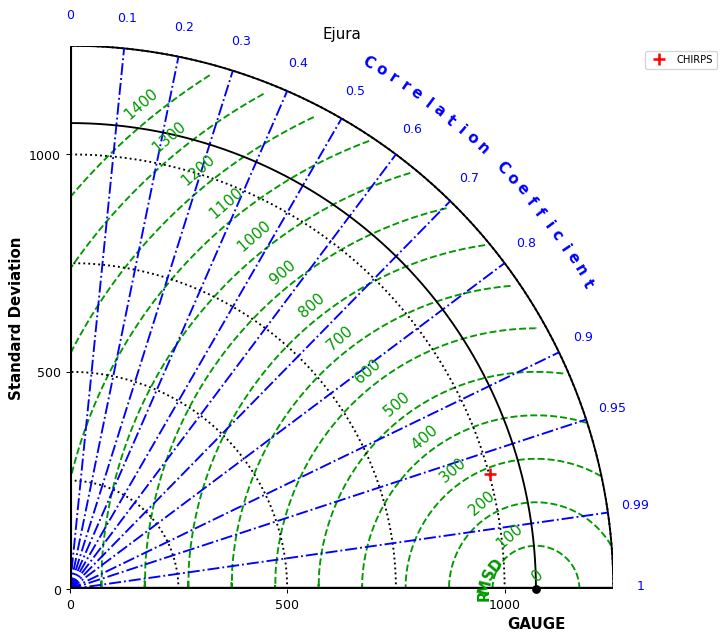

In [35]:
slf = pd.DataFrame([Ejura.G,Ejura.C])# Extracting portion of the data

slf=slf.T      #Transposed


slf_gauge=Ejura.G #Select all the Gauge Values
slf_chirp=Ejura.C #Select all the Chiprs values

corre = stats.pearsonr(slf_chirp,slf_gauge)#Correlation

mean= sum((slf_gauge-slf_chirp)**2)/len(slf_gauge)#calculation of mean

rmse = np.sqrt(mean)#calculation of root mean square

std_chirp = np.std(slf_chirp)# standard deviation 
std_gauge = np.std(slf_gauge)

slpd_cor = [1,corre[0]]
RMSE = [1,rmse]
std = [std_gauge,std_chirp]
label = ['GAUGE','CHIRPS']
#numberArray = np.array(([1,2,3],[4,5,6]))


fig1 = plt.figure(figsize=(12,8),dpi=90)

sdev = np.array(std)
crmsd = np.array(RMSE)
Ej_ccoef = np.array(slpd_cor)
rms = np.arange(0,1500,100)

fig1=sm.taylor_diagram(sdev,crmsd,Ej_ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'GAUGE',alpha=0.1)
plt.title('Ejura')
plt.savefig("Ejura_Taylor.jpeg")

In [36]:
Ej_ccoef

array([1.        , 0.96418639])

# Konongo Taylor Diagram

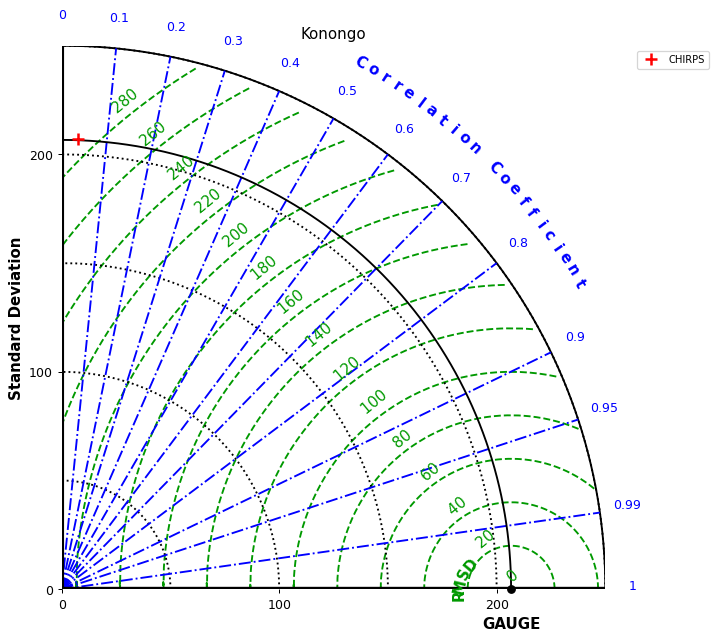

In [37]:
slf = pd.DataFrame([Konongo.G, Konongo.C])# Extracting portion of the data
# slf_2 = pd.DataFrame([fd.LE_Mod_Closed, fd.LE_Obs_Closed])

#slf=slf.T      #Transposed
# slf_2=slf_2.T

# slf=slf.dropna()
# # slf_2=slf_2.dropna()

slf_gauge=Konongo.G #Select all the OBS LE
slf_chirp=Konongo.C #Select all the 

corre = stats.pearsonr(slf_chirp,slf_gauge)#Correlation

mean= sum((slf_gauge-slf_chirp)**2)/len(slf_gauge)#calculation of mean

rmse = np.sqrt(mean)#calculation of root mean square

# standard deviation
std_chirp = np.std(slf_chirp) 
std_gauge = np.std(slf_gauge)

slpd_cor = [1,corre[1]]
RMSE = [1,rmse]
std = [std_gauge,std_chirp]
label = ['GAUGE','CHIRPS']
#numberArray = np.array(([1,2,3],[4,5,6]))


fig1 = plt.figure(figsize=(12,8),dpi=90)

sdev = np.array(std)
crmsd = np.array(RMSE)
K_ccoef = np.array(slpd_cor)
rms = np.arange(0,300,20)
# rms = np.arange(0,40,2)

fig1=sm.taylor_diagram(sdev,crmsd,K_ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'GAUGE',alpha=0.1)
plt.title('Konongo')
plt.savefig("SLH_Taylor.jpeg")

In [38]:
K_ccoef

array([1.        , 0.03521015])

In [52]:
CCOEF = [A_ccoef,Ar_ccoef,E_ccoef,Ej_ccoef,K_ccoef]
Cc = pd.DataFrame(CCOEF)

Cc

,0,1
0,1.0,0.422491
1,1.0,0.422491
2,1.0,0.389494
3,1.0,0.964186
4,1.0,0.035210
